In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Import dataset 
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Copy of Country Wise Air Pollutants(1).xlsx")
dataset.head(1)

,PM 2.5,PM 10,NO2,SO2,AQI
0,129,205,18,6,195


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM 2.5  600 non-null    int64
 1   PM 10   600 non-null    int64
 2   NO2     600 non-null    int64
 3   SO2     600 non-null    int64
 4   AQI     600 non-null    int64
dtypes: int64(5)
memory usage: 23.6 KB


<Axes: >

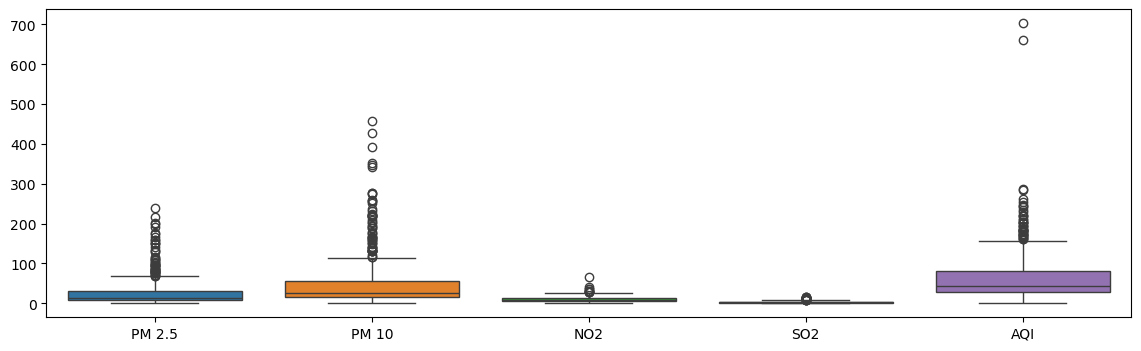

In [4]:
plt.figure(figsize=(14,4))
sns.boxplot(dataset)

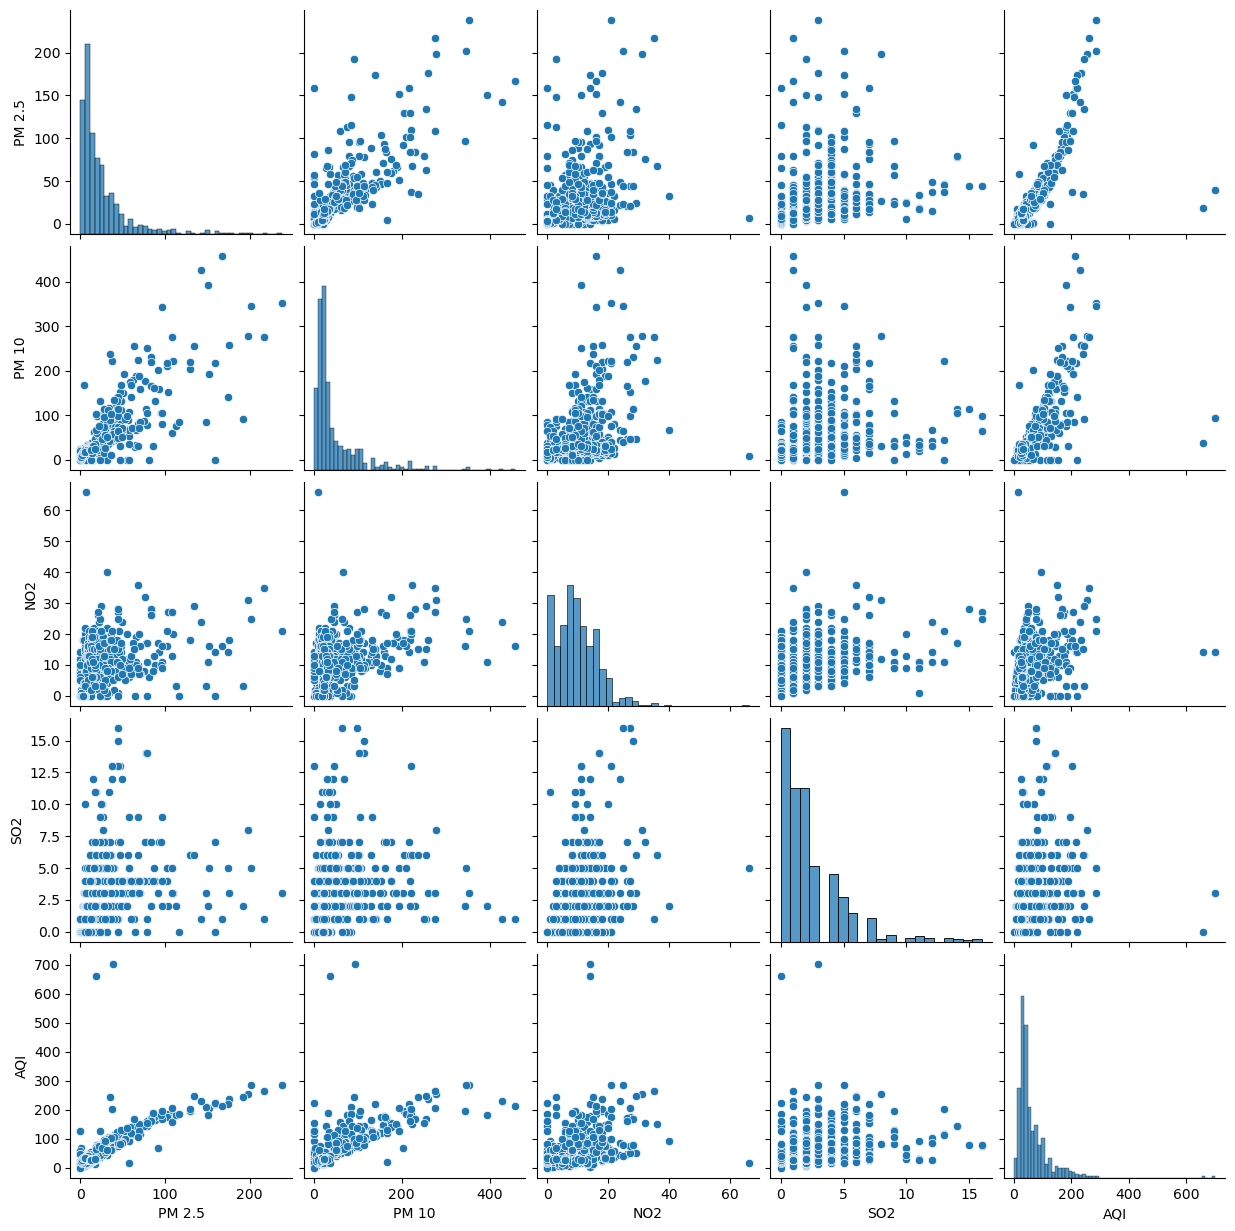

In [5]:
sns.pairplot(dataset)

<Axes: >

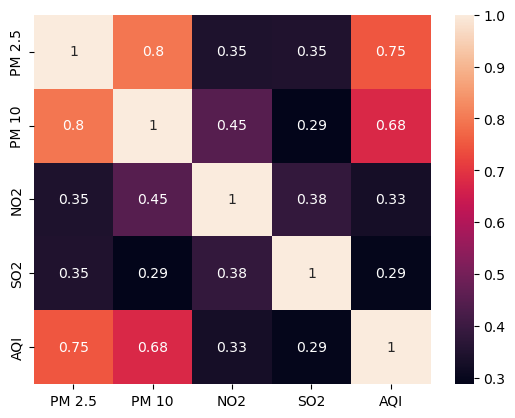

In [6]:
sns.heatmap(dataset.corr(),annot=True)

In [7]:
df1=dataset[["PM 2.5","PM 10","AQI"]] 

In [8]:
# Now removing outliers from all of the columns 

# Pm2.5

In [10]:
q1=df1["PM 2.5"].quantile(0.25)
q3=df1["PM 2.5"].quantile(0.75)
IQR=q3-q1
Min_range=q1-(1.5*IQR)
Max_range=q3+(1.5*IQR)
Min_range,Max_range

(-28.625, 68.375)

# Pm10

In [12]:
q1=df1["PM 10"].quantile(0.25)
q3=df1["PM 10"].quantile(0.75)
IQR=q3-q1
Min_range=q1-(1.5*IQR)
Max_range=q3+(1.5*IQR)
Min_range,Max_range

(-43.25, 114.75)

# AQI

In [14]:
q1=df1["AQI"].quantile(0.25)
q3=df1["AQI"].quantile(0.75)
IQR=q3-q1
Min_range=q1-(1.5*IQR)
Max_range=q3+(1.5*IQR)
Min_range,Max_range

(-47.5, 156.5)

In [15]:
# Remove the outlier values from the datset
df1=df1[df1["PM 2.5"]<68.375] # PM 2.5

In [16]:
df1.shape

(552, 3)

In [17]:
df1=df1[df1["PM 10"]<114.75]  # Pm 10 

In [18]:
df1.shape

(527, 3)

In [19]:
df1=df1[df1["AQI"]<156.5] 

In [20]:
df1.shape

(525, 3)

<Axes: >

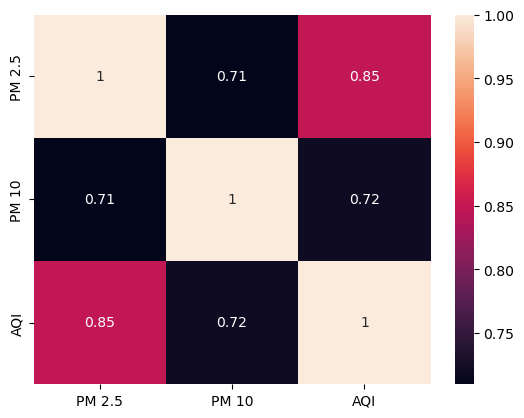

In [21]:
sns.heatmap(df1.corr(),annot=True)

In [22]:
df1.head()

,PM 2.5,PM 10,AQI
2,45,62,103
3,33,49,81
4,34,43,81
5,28,36,77
6,23,31,69


In [23]:
# Now split the dataset into x and y 
x=df1[["PM 2.5","PM 10"]]
y=df1["AQI"]

In [24]:
# Split the dataset into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.score(x_test,y_test)*100 # Accuracy  Percentage 

83.97092492970974

In [71]:
lr.score(x_train,y_train)*100

73.39323790828244

<Axes: xlabel='PM 2.5', ylabel='PM 10'>

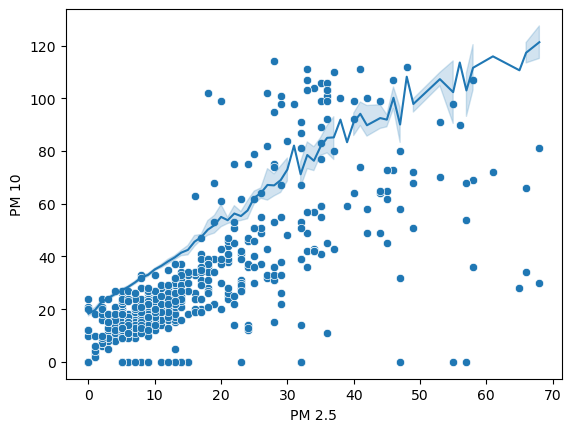

In [28]:
sns.scatterplot(x=df1["PM 2.5"],y=df1["PM 10"])
sns.lineplot(x=df1["PM 2.5"],y=lr.predict(x))

In [29]:
# lr.predict([[PM2.5,PM 10 ]])
lr.predict([[60,89]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118.71607634])

In [30]:
#df1=pd.DataFrame(df1)
#df1.to_excel(r"C:\Users\ASUS\OneDrive\Desktop\Output AQI clean.xlsx")
#print("Done")